# Prerequisites

In [2]:
import numpy as np
import matplotlib.pyplot as pl

import scvelo as scv
import numpy as np
import loompy
import scanpy.api as sc

import pandas as pd
from scanpy.tools import rna_velocity
from anndata import AnnData
import seaborn as sns
from scipy.sparse import csr_matrix
import networkx as nx
from matplotlib import rcParams
import seaborn as sns
import scipy as sci
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.3.2 anndata==0.6.10 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [3]:
loompy.__version__

'2.0.12'

In [4]:

scv.__version__

'0.1.16.dev13+c1a6dad'

In [ ]:
loompy.combine(['/storage_scratch/users/sophie.tritschler/2018_10X_GlpEst/180306_GlpEst_G1/velocyto/180306_GlpEst_G1.loom',
               '/storage_scratch/users/sophie.tritschler/2018_10X_GlpEst/180306_GlpEst_G2/velocyto/180306_GlpEst_G2.loom',
               '/storage_scratch/users/sophie.tritschler/2018_10X_GlpEst/180306_GlpEst_G3/velocyto/180306_GlpEst_G3.loom',
               '/storage_scratch/users/sophie.tritschler/2018_10X_GlpEst/180306_GlpEst_G4/velocyto/180306_GlpEst_G4.loom',
               '/storage_scratch/users/sophie.tritschler/2018_10X_GlpEst/180306_GlpEst_G5/velocyto/180306_GlpEst_G5.loom',
               '/storage_scratch/users/sophie.tritschler/2018_10X_GlpEst/180306_GlpEst_G6/velocyto/180306_GlpEst_G6.loom',
               '/storage_scratch/users/sophie.tritschler/2018_10X_GlpEst/180306_GlpEst_G8/velocyto/180306_GlpEst_G8.loom'],
                '/storage_scratch/users/sophie.tritschler/2018_10X_GlpEst/glpest_combined.loom', key="Accession")

In [7]:
adata_raw = sc.read('./glpest_combined.loom',cache=True)

... reading from cache file ./cache/storage-scratch-users-sophie.tritschler-2018_10X_GlpEst-glpest_combined.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [12]:
adata_raw.var_names_make_unique()

In [ ]:
adata_endo_hvg=sc.read('./endo_norm_log_hvg_paper.h5ad')

In [19]:
y1_name=[s[14:16] for s in adata_raw.obs_names]


In [11]:
adata_raw.obs['groups']=pd.Categorical(y1_name,categories=['G1','G2','G3','G4','G5','G6','G8'])
adata_raw_ordered=adata_raw.copy()


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [13]:
y_new=[s[17:33] for s in adata_raw.obs_names]
y_new_2=[s + '-1_'+t for s,t in zip(y_new,y1_name)]

In [16]:
adata_raw_ordered.obs_names=y_new_2
adata_raw_ordered=adata_raw_ordered[adata_endo_hvg.obs_names]

In [490]:
adata_raw_ordered.obsm['X_umap']=adata_endo_hvg.obsm['X_umap']
adata_raw_ordered.obs['groups_named_fine']=adata_endo_hvg.obs['groups_named_fine']
adata_raw_ordered.obs['groups_named_broad']=adata_endo_hvg.obs['groups_named_broad']
adata_raw_ordered.uns['groups_named_broad_colors']=adata_endo_hvg.uns['groups_named_broad_colors']
adata_raw_ordered.obs['treatment']=adata_endo_hvg.obs['treatment']
adata_raw_ordered.uns['treatment_colors']=adata_endo_hvg.uns['treatment_colors']

In [18]:
adata_raw_ordered.write('./adata_velocyto_raw_ordered.h5ad')

In [7]:
adata_raw_ordered = sc.read('./adata_velocyto_raw_ordered.h5ad',cache=True)

In [102]:
cols_all=adata_endo_hvg.uns['groups_named_fine_colors']

In [166]:
cols_cd=['#a50f15', '#f46d43', '#fdae61', '#aec7e8', '#98df8a',
       '#2ca02c', '#ff9896', '#9467bd', '#b15928', '#1f78b4']

In [94]:
pos=np.array([[-7, -3.3175023824],
       [-6 , -0.8610376029],
       [-9, 2],
       [-3,  2],
       [ -7,  4],
       [-5, 6],
       [10.1631199571,  3.4228599671],
       [ 7.951153206 ,  1.2951546357],
       [ 6.9991351026,  5.0314498193],
       [ 6.0593712466,  2.7509562329],
       [ -3,  8.9667552257]])

In [95]:
pos_cd=np.array([[-7, -3.3175023824],
       [-6 , -0.8610376029],
       [-9, 2],
       [-3,  2],
       #[ -7,  4],
       [-5, 6],
       [10.1631199571,  3.4228599671],
       [ 7.951153206 ,  1.2951546357],
       [ 6.9991351026,  5.0314498193],
       [ 6.0593712466,  2.7509562329],
       [ -3,  8.9667552257]])

# All treatments

## Velocitiy estimation

we compute the velocities for each gene using all cells

In [12]:
adata_endo_hvg_all=adata_endo_hvg.copy()
adata_endo_velo_all=adata_endo_velo.copy()


In [1]:
adata_endo_velo_all.uns['groups_named_fine_colors']=adata_endo_hvg.uns['groups_named_fine_colors']
adata_endo_hvg_all.uns['groups_named_fine_colors']=adata_endo_hvg.uns['groups_named_fine_colors']

In [14]:
scv.pp.filter_genes(adata_endo_velo_all,min_cells=30,min_cells_u=30)
scv.pp.normalize_per_cell(adata_endo_velo_all)
scv.pp.log1p(adata_endo_velo_all)
scv.pp.moments(adata_endo_velo_all)
scv.tl.velocity(adata_endo_velo_all,perc=95)

Filtered out 12777 genes that are detected in less than 30 cells (spliced).
Filtered out 2650 genes that are detected in less than 30 cells (unspliced).
Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:04:51.37) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:01:58.11) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
computing velocities
    finished (0:02:29.73) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


## mSTZ

In [ ]:
## subset the data
treat=['Ctrl','Vehicle-STZ']
ix=np.isin(adata_endo_hvg_all.obs['treatment'],[treat])
adata_hvg_endo_stz=adata_endo_hvg_all[ix].copy()
adata_velo_endo_stz=adata_endo_velo_all[ix].copy()
adata_hvg_endo_stz.uns['groups_named_fine_colors']=cols_all

In [ ]:
## compute embedding
sc.pp.pca(adata_hvg_endo_stz)
sc.pp.neighbors(adata_hvg_endo_stz)
sc.tl.paga(adata_hvg_endo_stz,groups='groups_named_fine')
scv.settings.set_figure_params(figsize=(4,4))
sc.pl.paga(adata_hvg_endo_stz,pos=pos,frameon=False)
sc.tl.umap(adata_hvg_endo_stz,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_hvg_endo_stz,color=['groups_named_fine'])
adata_velo_endo_stz.obsm['X_umap']=adata_hvg_endo_stz.obsm['X_umap']
adata_velo_endo_stz.uns['neighbors']=adata_hvg_endo_stz.uns['neighbors']

In [ ]:
## compute velocity graph
scv.tl.velocity_genes(adata_velo_endo_stz, min_r2=.1)
scv.tl.velocity_graph(adata_velo_endo_stz)
scv.tl.velocity_embedding(adata_velo_endo_stz, basis='umap')

In [ ]:
## plot velocity
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_stz, basis='umap', color='groups_named_fine',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_stz, basis='umap', color='treatment',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)

## PEG-insulin

### origin

In [ ]:
## subset the data
treat=['Vehicle-STZ','PEG-insulin']
ix=np.isin(adata_endo_hvg_all.obs['treatment'],[treat])
adata_hvg_endo_ins=adata_endo_hvg_all[ix].copy()
adata_velo_endo_ins=adata_endo_velo_all[ix].copy()
adata_hvg_endo_ins.uns['groups_named_fine_colors']=adata_endo_hvg.uns['groups_named_fine_colors']

In [ ]:
## compute embedding
sc.pp.pca(adata_hvg_endo_ins)
sc.pp.neighbors(adata_hvg_endo_ins)
sc.tl.paga(adata_hvg_endo_ins,groups='groups_named_fine')
scv.settings.set_figure_params(figsize=(4,4))
sc.pl.paga(adata_hvg_endo_ins,pos=pos,frameon=False)
sc.tl.umap(adata_hvg_endo_ins,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_hvg_endo_ins,color=['groups_named_fine'])
adata_velo_endo_ins.obsm['X_umap']=adata_hvg_endo_ins.obsm['X_umap']
adata_velo_endo_ins.uns['neighbors']=adata_hvg_endo_ins.uns['neighbors']

In [ ]:
## compute velocity graph
scv.tl.velocity_genes(adata_velo_endo_ins, min_r2=.1)
scv.tl.velocity_graph(adata_velo_endo_ins)
scv.tl.velocity_embedding(adata_velo_endo_ins, basis='umap')

In [ ]:
## plot velocity
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_ins, basis='umap', color='groups_named_fine',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_ins, basis='umap', color='treatment',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)

### fate

In [ ]:
## subset the data
treat=['Ctrl','PEG-insulin']
ix=np.isin(adata_endo_hvg_all.obs['treatment'],[treat])
adata_hvg_endo_ins_4=adata_endo_hvg_all[ix].copy()
adata_velo_endo_ins_4=adata_endo_velo_all[ix].copy()
adata_hvg_endo_ins_4.uns['groups_named_fine_colors']=cols_cd

In [ ]:
## compute embedding
sc.pp.pca(adata_hvg_endo_ins_4)
sc.pp.neighbors(adata_hvg_endo_ins_4)
sc.tl.paga(adata_hvg_endo_ins_4,groups='groups_named_fine')
scv.settings.set_figure_params(figsize=(4,4))
sc.pl.paga(adata_hvg_endo_ins_4,pos=pos_cd,frameon=False)
sc.tl.umap(adata_hvg_endo_ins_4,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_hvg_endo_ins_4,color=['groups_named_fine'])
adata_velo_endo_ins_4.obsm['X_umap']=adata_hvg_endo_ins_4.obsm['X_umap']
adata_velo_endo_ins_4.uns['neighbors']=adata_hvg_endo_ins_4.uns['neighbors']

In [ ]:
## compute velocity graph
scv.tl.velocity_genes(adata_velo_endo_ins_4, min_r2=.1)
scv.tl.velocity_graph(adata_velo_endo_ins_4)
scv.tl.velocity_embedding(adata_velo_endo_ins_4, basis='umap')


In [ ]:
## plot velocity
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_ins_4, basis='umap', color='groups_named_fine',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_ins_4, basis='umap', color='treatment',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)


## GLP1/estrogen + PEG - insulin

### origin

In [ ]:
## subset the data
treat=['Vehicle-STZ','GLP1-E + PEG-insulin']
ix=np.isin(adata_endo_hvg_all.obs['treatment'],[treat])
adata_hvg_endo_glpest_ins=adata_endo_hvg_all[ix].copy()
adata_velo_endo_glpest_ins=adata_endo_velo_all[ix].copy()
adata_hvg_endo_glpest_ins.uns['groups_named_fine_colors']=adata_endo_hvg.uns['groups_named_fine_colors']

In [ ]:
## compute embedding
sc.pp.pca(adata_hvg_endo_glpest_ins)
sc.pp.neighbors(adata_hvg_endo_glpest_ins)
sc.tl.paga(adata_hvg_endo_glpest_ins,groups='groups_named_fine')
scv.settings.set_figure_params(figsize=(4,4))
sc.pl.paga(adata_hvg_endo_glpest_ins,pos=pos,frameon=False)
sc.tl.umap(adata_hvg_endo_glpest_ins,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_hvg_endo_glpest_ins,color=['groups_named_fine'])
adata_velo_endo_glpest_ins.obsm['X_umap']=adata_hvg_endo_glpest_ins.obsm['X_umap']
adata_velo_endo_glpest_ins.uns['neighbors']=adata_hvg_endo_glpest_ins.uns['neighbors']

In [ ]:
##compute velocity graph
scv.tl.velocity_genes(adata_velo_endo_glpest_ins, min_r2=.1)
scv.tl.velocity_graph(adata_velo_endo_glpest_ins)
scv.tl.velocity_embedding(adata_velo_endo_glpest_ins, basis='umap')

In [ ]:
##plot velocity
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_glpest_ins, basis='umap', color='groups_named_fine',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_glpest_ins, basis='umap', color='treatment',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)

### fate

In [ ]:
##subset the data
treat=['Ctrl','GLP1-E + PEG-insulin']
ix=np.isin(adata_endo_hvg_all.obs['treatment'],[treat])
adata_hvg_endo_glpest_ins_4=adata_endo_hvg_all[ix].copy()
adata_velo_endo_glpest_ins_4=adata_endo_velo_all[ix].copy()
adata_hvg_endo_glpest_ins_4.uns['groups_named_fine_colors']=cols_cd

In [ ]:
##compute embedding
sc.pp.pca(adata_hvg_endo_glpest_ins_4)
sc.pp.neighbors(adata_hvg_endo_glpest_ins_4)
sc.tl.paga(adata_hvg_endo_glpest_ins_4,groups='groups_named_fine')
scv.settings.set_figure_params(figsize=(4,4))
sc.pl.paga(adata_hvg_endo_glpest_ins_4,pos=pos_cd,frameon=False)
sc.tl.umap(adata_hvg_endo_glpest_ins_4,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_hvg_endo_glpest_ins_4,color=['groups_named_fine'])
adata_velo_endo_glpest_ins_4.obsm['X_umap']=adata_hvg_endo_glpest_ins_4.obsm['X_umap']
adata_velo_endo_glpest_ins_4.uns['neighbors']=adata_hvg_endo_glpest_ins_4.uns['neighbors']

In [ ]:
##compute velocity graph
scv.tl.velocity_genes(adata_velo_endo_glpest_ins_4, min_r2=.1)
scv.tl.velocity_graph(adata_velo_endo_glpest_ins_4)
scv.tl.velocity_embedding(adata_velo_endo_glpest_ins_4, basis='umap')


In [ ]:
##plot velocity
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_glpest_ins_4, basis='umap', color='groups_named_fine',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_glpest_ins_4, basis='umap', color='treatment',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)


## GLP1/estrogen

### origin

In [ ]:
##subset the data
treat=['Vehicle-STZ','GLP1-E']
ix=np.isin(adata_endo_hvg_all.obs['treatment'],[treat])
adata_hvg_endo_glpest=adata_endo_hvg_all[ix].copy()
adata_velo_endo_glpest=adata_endo_velo_all[ix].copy()
adata_hvg_endo_glpest.uns['groups_named_fine_colors']=adata_endo_hvg.uns['groups_named_fine_colors']

In [ ]:
##compute embedding
sc.pp.pca(adata_hvg_endo_glpest)
sc.pp.neighbors(adata_hvg_endo_glpest)
sc.tl.paga(adata_hvg_endo_glpest,groups='groups_named_fine')
scv.settings.set_figure_params(figsize=(4,4))
sc.pl.paga(adata_hvg_endo_glpest,pos=pos,frameon=False)
sc.tl.umap(adata_hvg_endo_glpest,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_hvg_endo_glpest,color=['groups_named_fine'])
adata_velo_endo_glpest.obsm['X_umap']=adata_hvg_endo_glpest.obsm['X_umap']
adata_velo_endo_glpest.uns['neighbors']=adata_hvg_endo_glpest.uns['neighbors']

In [ ]:
##compute velocity graph
scv.tl.velocity_genes(adata_velo_endo_glpest, min_r2=.1)
scv.tl.velocity_graph(adata_velo_endo_glpest)
scv.tl.velocity_embedding(adata_velo_endo_glpest, basis='umap')

In [ ]:
##plot velocity
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_glpest, basis='umap', color='groups_named_fine',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_glpest, basis='umap', color='treatment',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)

### fate

In [ ]:
##subset the data
treat=['Ctrl','GLP1-E']
ix=np.isin(adata_endo_hvg_all.obs['treatment'],[treat])
adata_hvg_endo_glpest_4=adata_endo_hvg_all[ix].copy()
adata_velo_endo_glpest_4=adata_endo_velo_all[ix].copy()
adata_hvg_endo_glpest_4.uns['groups_named_fine_colors']=cols_cd

In [ ]:
##compute embedding
sc.pp.pca(adata_hvg_endo_glpest_4)
sc.pp.neighbors(adata_hvg_endo_glpest_4)
sc.tl.paga(adata_hvg_endo_glpest_4,groups='groups_named_fine')
scv.settings.set_figure_params(figsize=(4,4))
sc.pl.paga(adata_hvg_endo_glpest_4,pos=pos_cd,frameon=False)
sc.tl.umap(adata_hvg_endo_glpest_4,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_hvg_endo_glpest_4,color=['groups_named_fine'])
adata_velo_endo_glpest_4.obsm['X_umap']=adata_hvg_endo_glpest_4.obsm['X_umap']
adata_velo_endo_glpest_4.uns['neighbors']=adata_hvg_endo_glpest_4.uns['neighbors']

In [ ]:
##compute velocity graph
scv.tl.velocity_genes(adata_velo_endo_glpest_4, min_r2=.1)
scv.tl.velocity_graph(adata_velo_endo_glpest_4)
scv.tl.velocity_embedding(adata_velo_endo_glpest_4, basis='umap')

In [ ]:
##plot velocity
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_glpest_4, basis='umap', color='groups_named_fine',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding(adata_velo_endo_glpest_4, basis='umap', color='treatment',
                          legend_fontsize=12,density=0.2,
                          scale=0.18,arrow_size=4)

# Streamline plots for manuscript

saving figure to file ./figures/velocity_umap__stream_stz_cd.png


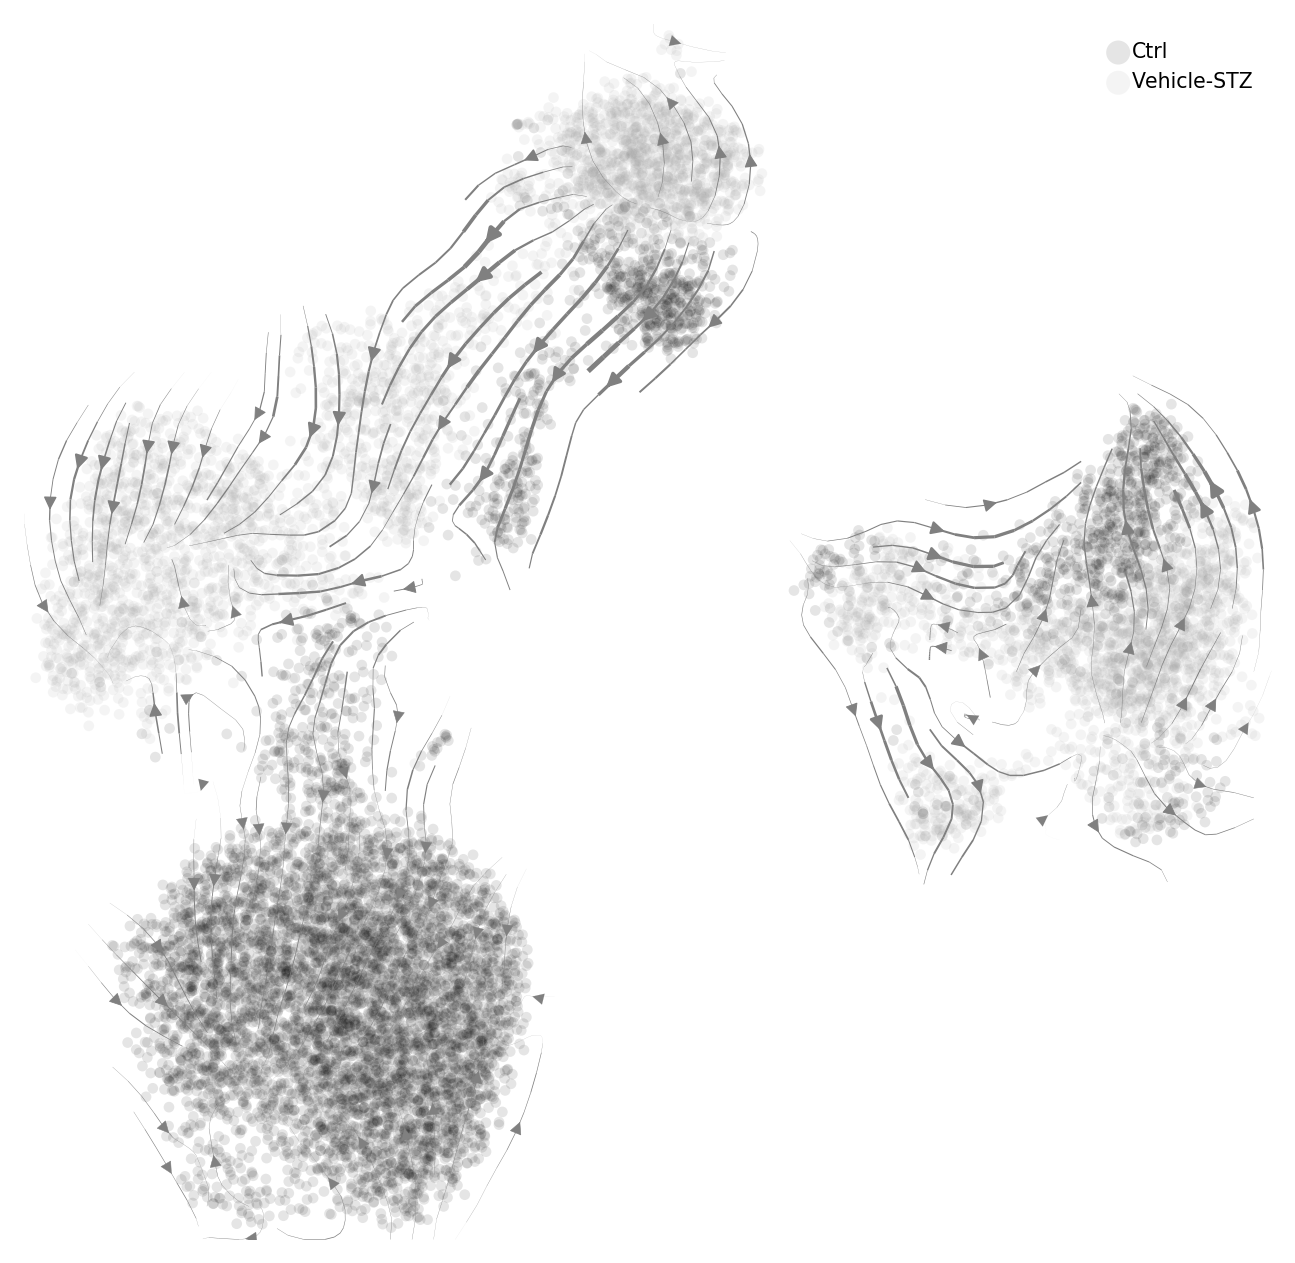

In [159]:
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding_stream(adata_velo_endo_stz,linewidth=1,legend_loc='upper right',density=1 ,title='',
                                 basis='umap', color='treatment',save='_stream_stz_cd.png')

saving figure to file ./figures/velocity_umap__stream_stz_glpest.png


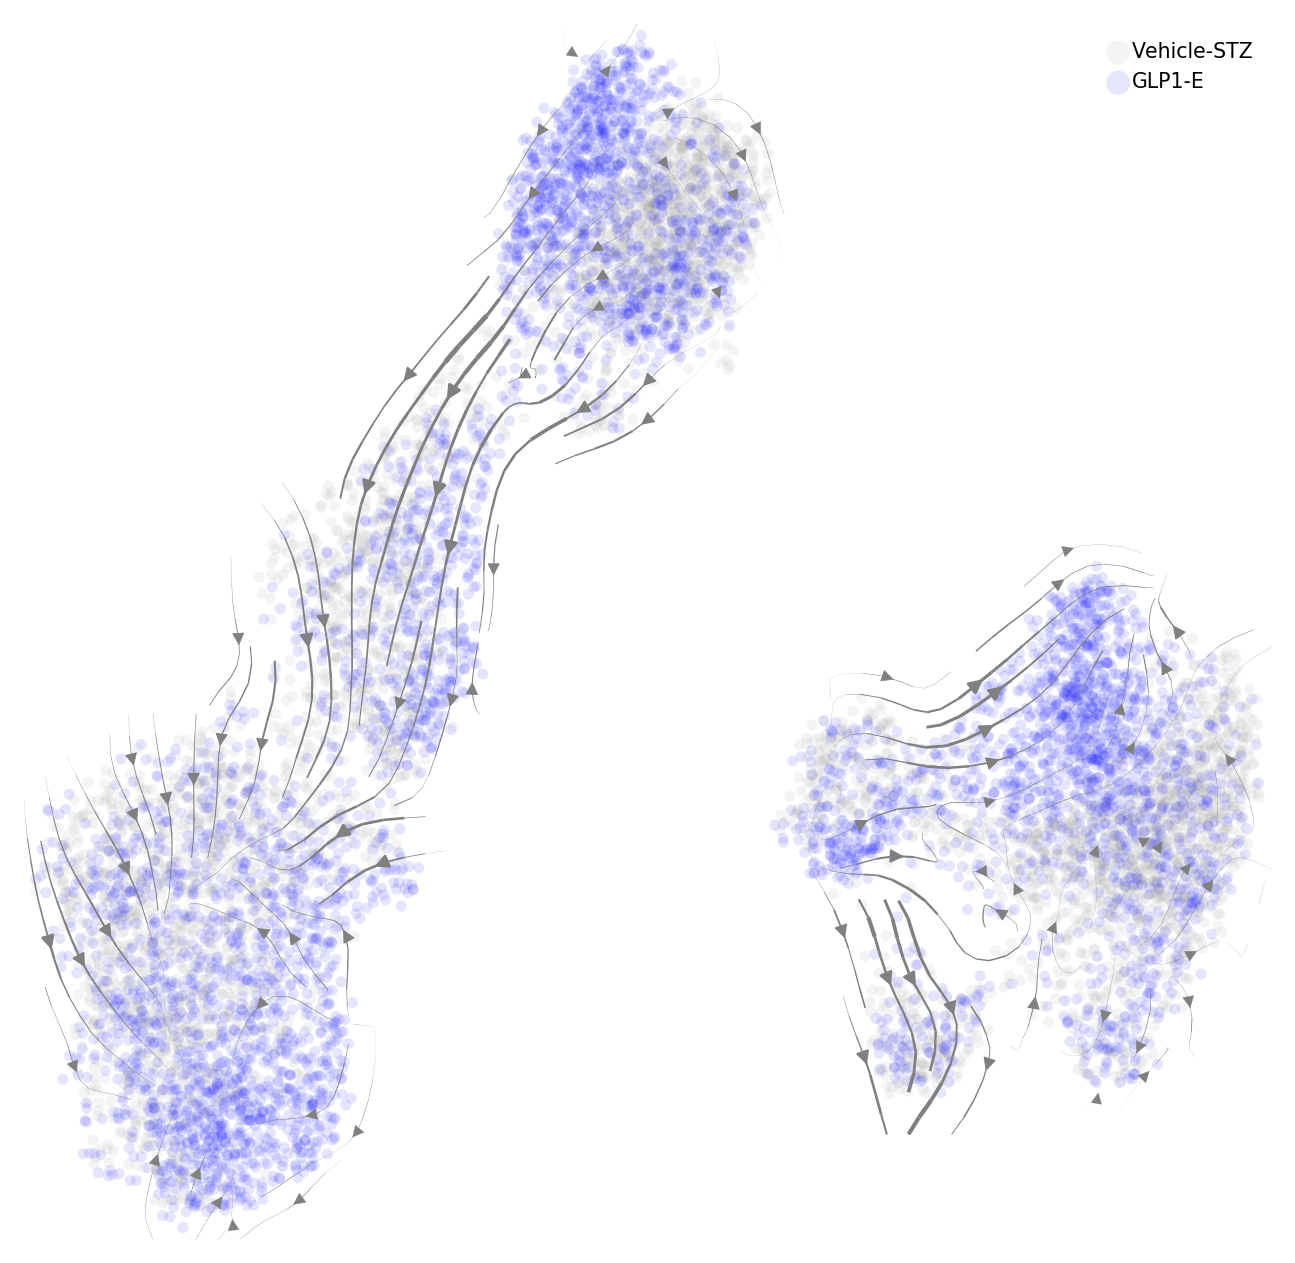

saving figure to file ./figures/velocity_umap__stream_cd_glpest.png


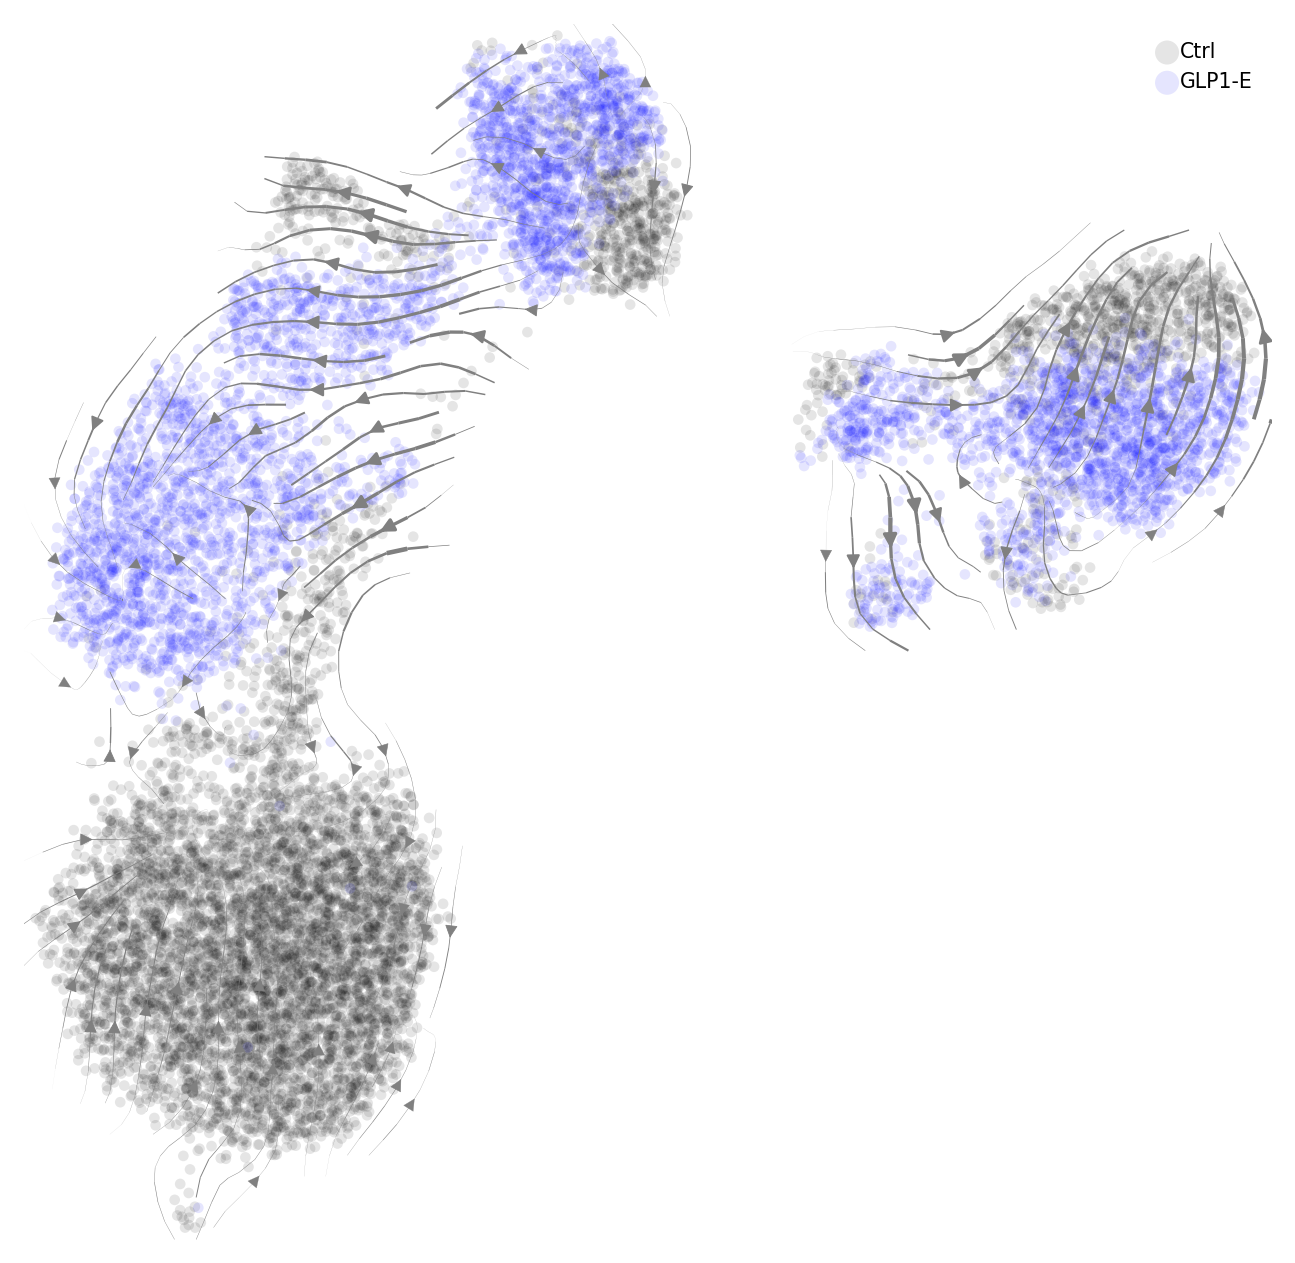

In [158]:
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding_stream(adata_velo_endo_glpest,linewidth=1,legend_loc='upper right',density=1 ,title='',
                                 basis='umap', color='treatment',save='_stream_stz_glpest.png')
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding_stream(adata_velo_endo_glpest_4,linewidth=1,density=1,legend_loc='upper right',title='', 
                                 basis='umap', color='treatment',save='_stream_cd_glpest.png')

saving figure to file ./figures/velocity_umap__stream_stz_glpest_ins.png


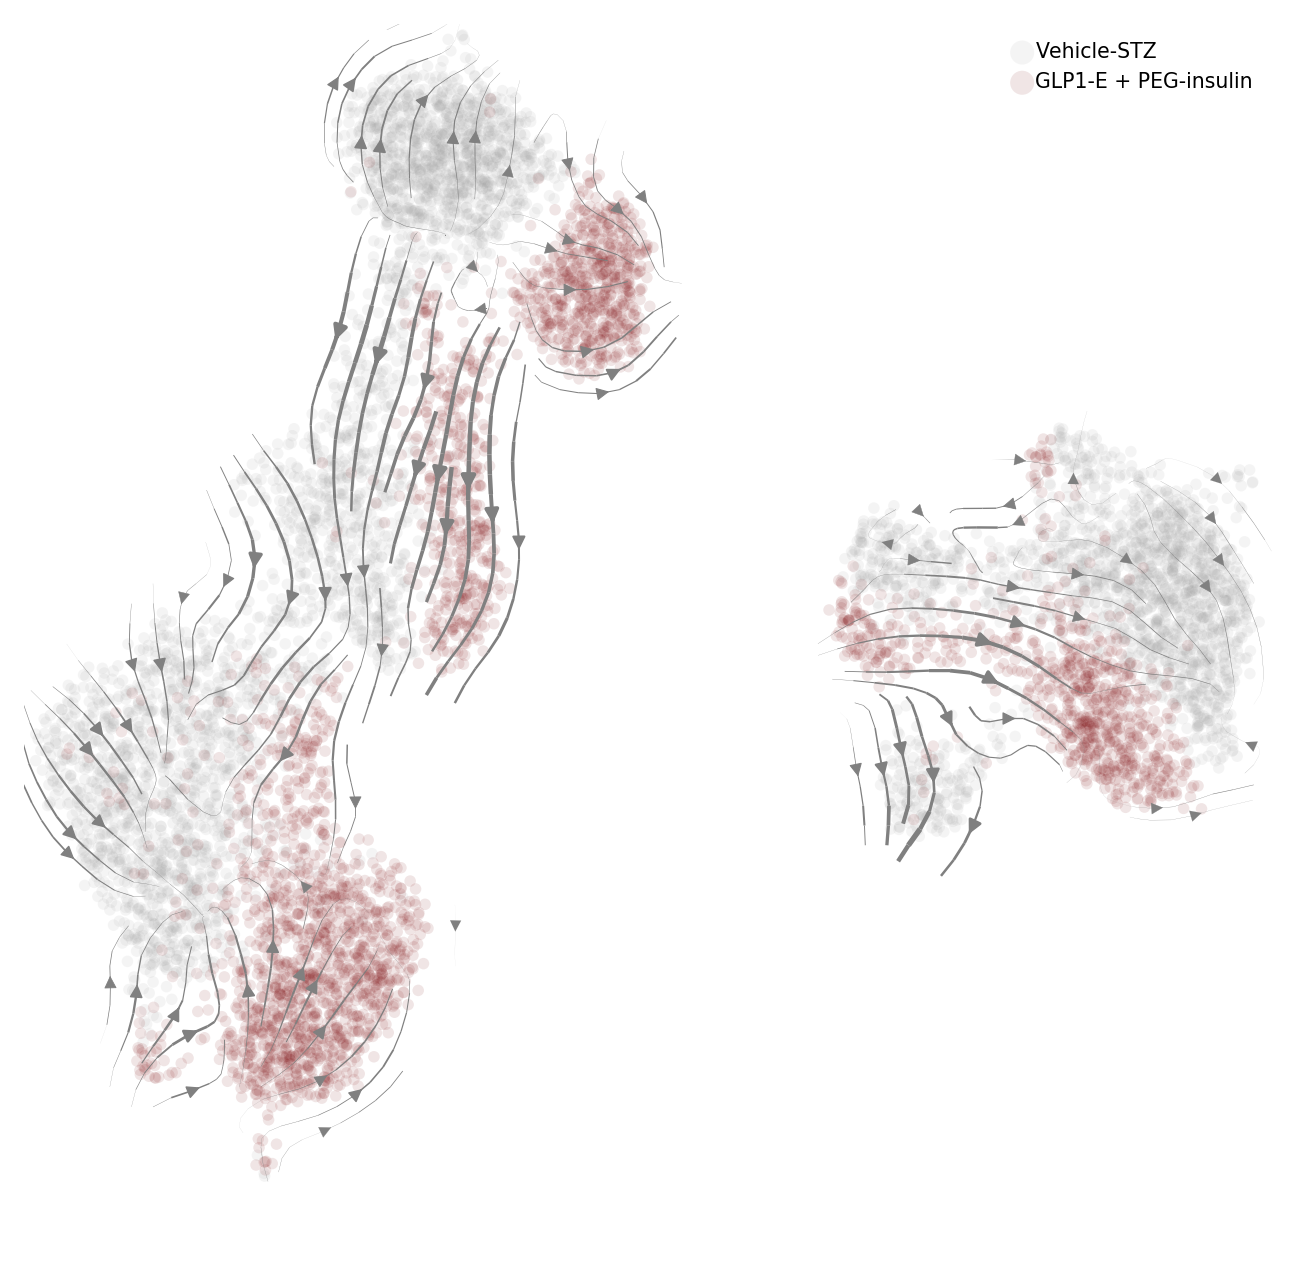

saving figure to file ./figures/velocity_umap__stream_cd_glpest_ins.png


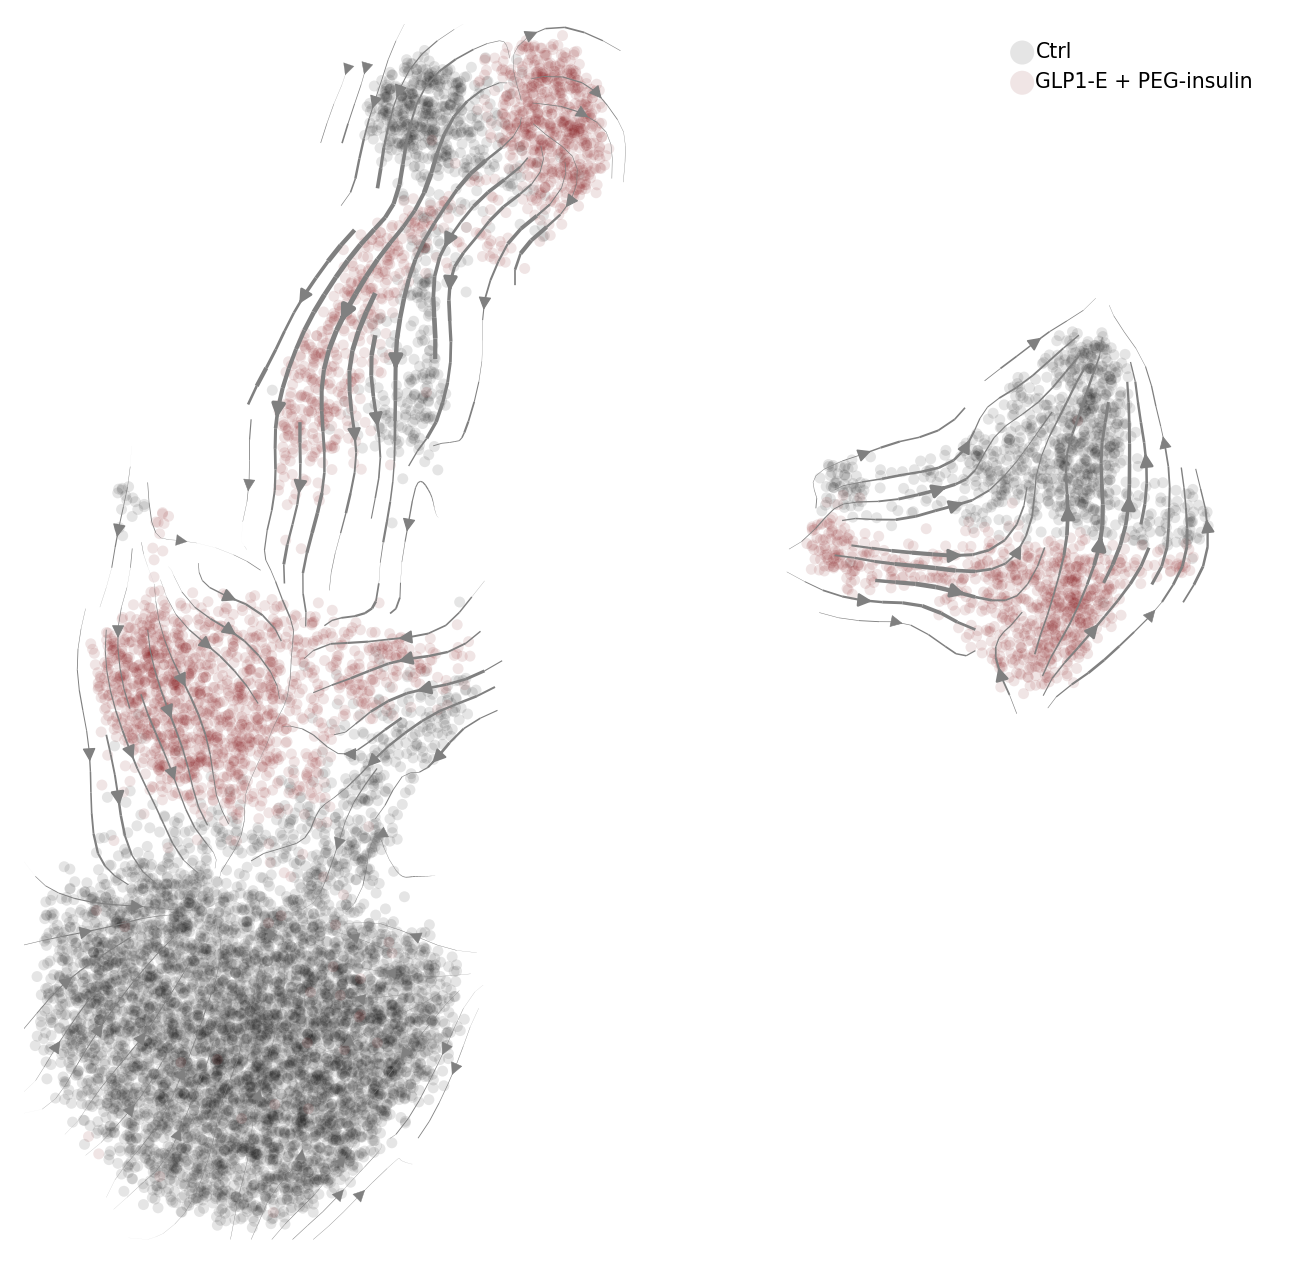

In [160]:
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding_stream(adata_velo_endo_glpest_ins,linewidth=1,legend_loc='upper right',density=1 ,title='',
                                 basis='umap', color='treatment',save='_stream_stz_glpest_ins.png')
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding_stream(adata_velo_endo_glpest_ins_4,linewidth=1,density=1,legend_loc='upper right',title='', 
                                 basis='umap', color='treatment',save='_stream_cd_glpest_ins.png')

saving figure to file ./figures/velocity_umap__stream_stz_ins.png


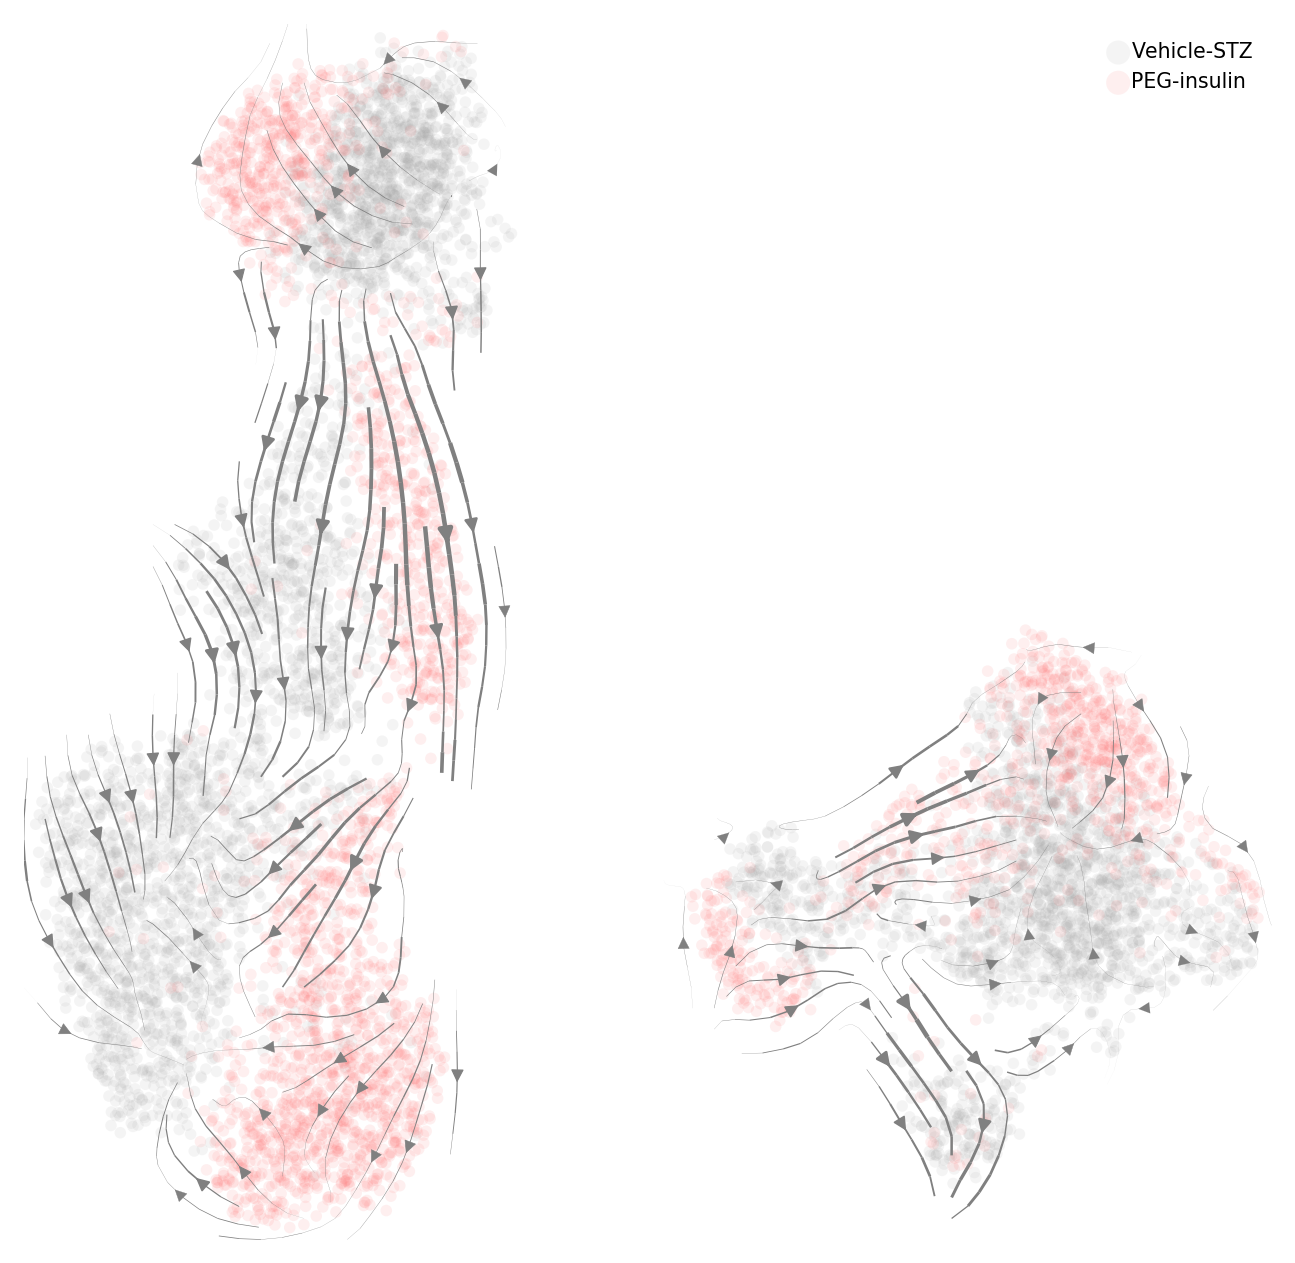

saving figure to file ./figures/velocity_umap__stream_cd_ins.png


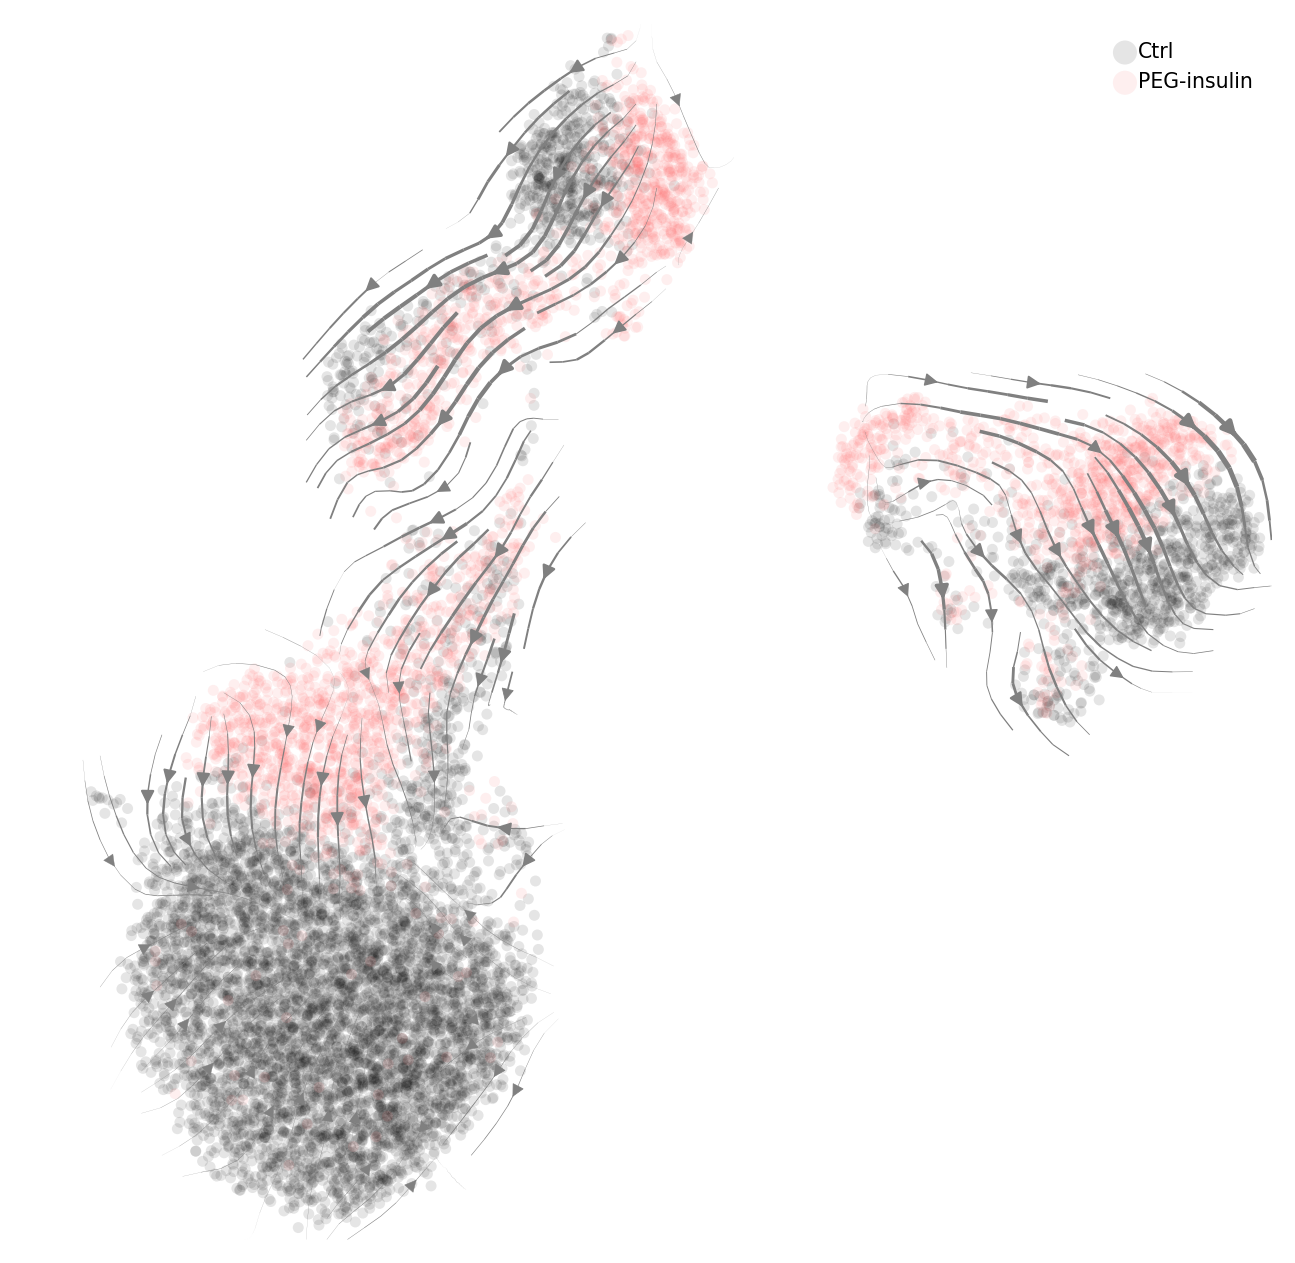

In [162]:
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding_stream(adata_velo_endo_ins,linewidth=1,legend_loc='upper right',density=1 ,title='',
                                 basis='umap', color='treatment',save='_stream_stz_ins.png')
scv.settings.set_figure_params(figsize=(8,8))
scv.pl.velocity_embedding_stream(adata_velo_endo_ins_4,linewidth=1,density=1,legend_loc='upper right',title='', 
                                 basis='umap', color='treatment',save='_stream_cd_ins.png')